In [1]:
import glob2
import os
PATH = "./dataset/raw_videos/raw_videos/"

video_list = glob2.glob(PATH + "*.avi")

In [2]:
video_list[0]

'./dataset/raw_videos/raw_videos/021366tv01.avi'

In [3]:
# consider tv01 and tv02.avi 
video_shot_list = []
for path in video_list:
    shot_num = path.split("/")[-1].split(".")[0][:-4]
    shot_num = int(shot_num)
    video_shot_list.append(shot_num)

import numpy as np
video_shot_list = np.unique(np.array(video_shot_list)).tolist()

print("total video number : ", len(video_shot_list))

total video number :  82


In [4]:
from src.utils.utility import show_data_composition
show_data_composition("./dataset/dur21_dis0")

########### Total Dataset Composition ########### 
disruption :  77
normal :  9942
########### Train Dataset Composition ########### 
disruption :  45
normal :  5952
########### Valid Dataset Composition ########### 
disruption :  16
normal :  1990
########### Test Dataset Composition ########### 
disruption :  16
normal :  2000


/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/torchvision/transforms/_functional_video.py:5: UserWarning: The _functional_video module is deprecated. Please use the functional module instead.
  warnings.warn(
/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/torchvision/transforms/_transforms_video.py:25: UserWarning: The _transforms_video module is deprecated. Please use the transforms module instead.
  warnings.warn(


In [5]:
import pandas as pd
kstar_shot_df = pd.read_csv('./dataset/KSTAR_Disruption_Shot_List.csv')
kstar_shot_df.head()

,shot,year,tftsrt,tipminf,tTQend,Isdata
0,12350,2015,1.5,5.246,5.2248,NaN
1,12372,2015,0.7,3.818,3.8026,NaN
2,12415,2015,1.9,4.769,4.7450,NaN
3,12438,2015,1.1,3.702,3.6826,NaN
4,12481,2015,1.9,5.217,5.1923,NaN


In [6]:
kstar_shot_df[kstar_shot_df.shot == 21274]

,shot,year,tftsrt,tipminf,tTQend,Isdata
1015,21274,2018,2.996,10.056,10.038,NaN


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

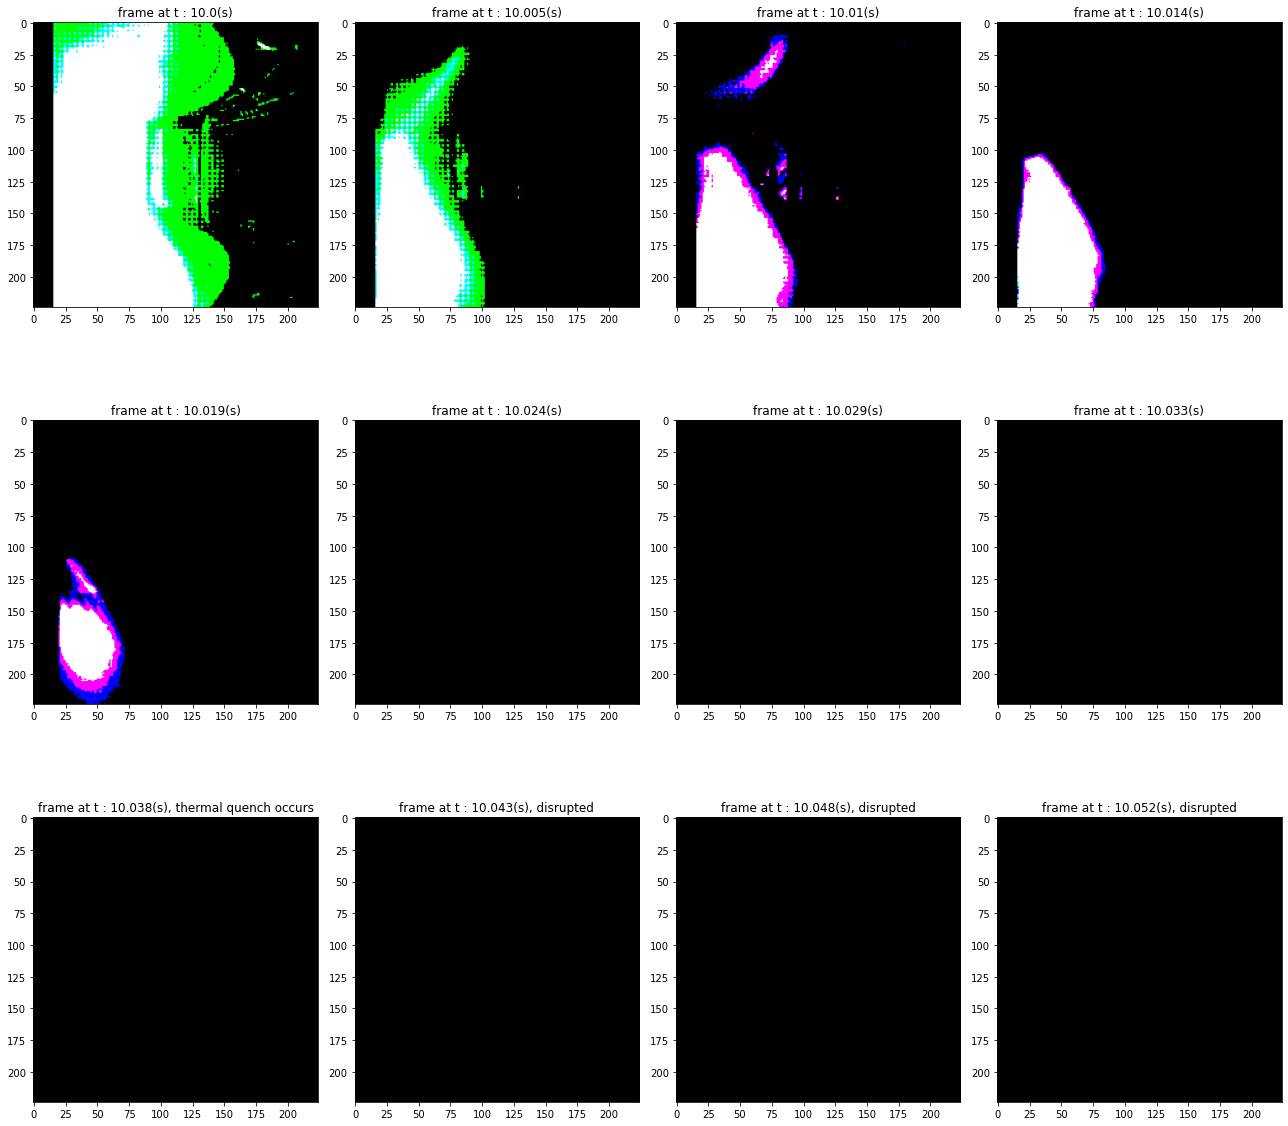

In [7]:
# example
from src.visualization.visualize_video import show_all_frame
shot_num = 21274

show_all_frame(
    shot_number = shot_num,
    t_start = 10.0, 
    t_end = None, 
    t_interval = 1.0 / 210,
)

In [8]:
kstar_shot_df[kstar_shot_df.shot == 21747]

,shot,year,tftsrt,tipminf,tTQend,Isdata
1094,21747,2018,3.724,11.451,11.419,NaN


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


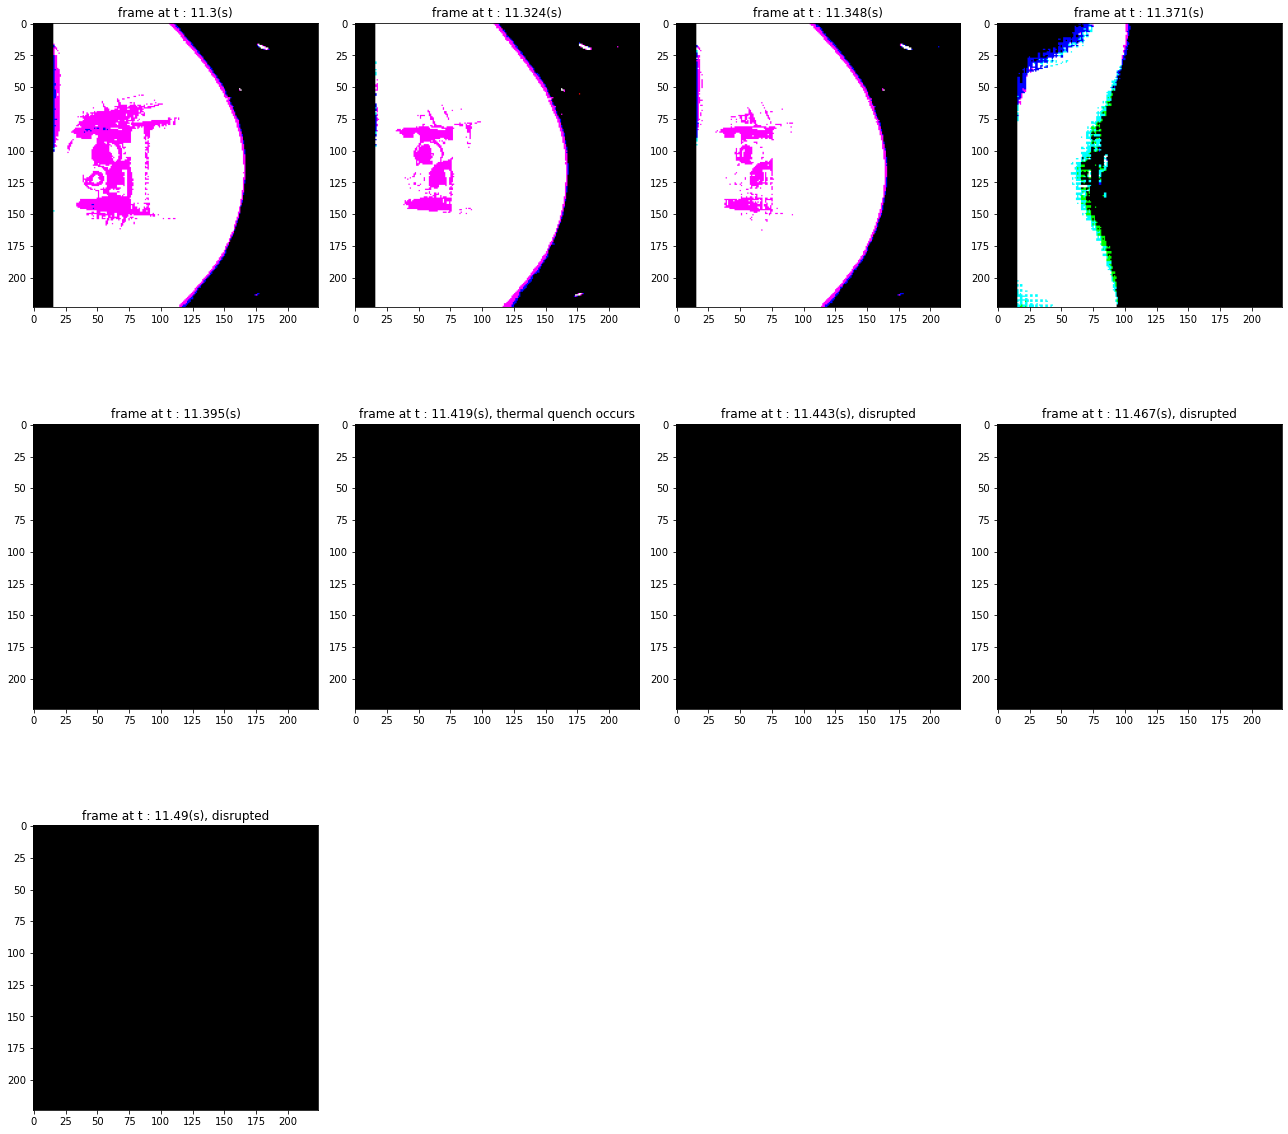

In [9]:
from src.visualization.visualize_video import show_all_frame

shot_number = 21747

show_all_frame(
    shot_number = shot_number,
    t_start = 11.3, 
    t_end = None, 
    t_interval = 1.0 / 210 * 5,
)

In [10]:
kstar_shot_df[kstar_shot_df.shot == 21731]

,shot,year,tftsrt,tipminf,tTQend,Isdata
1092,21731,2018,1.5,4.913,4.895,NaN


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


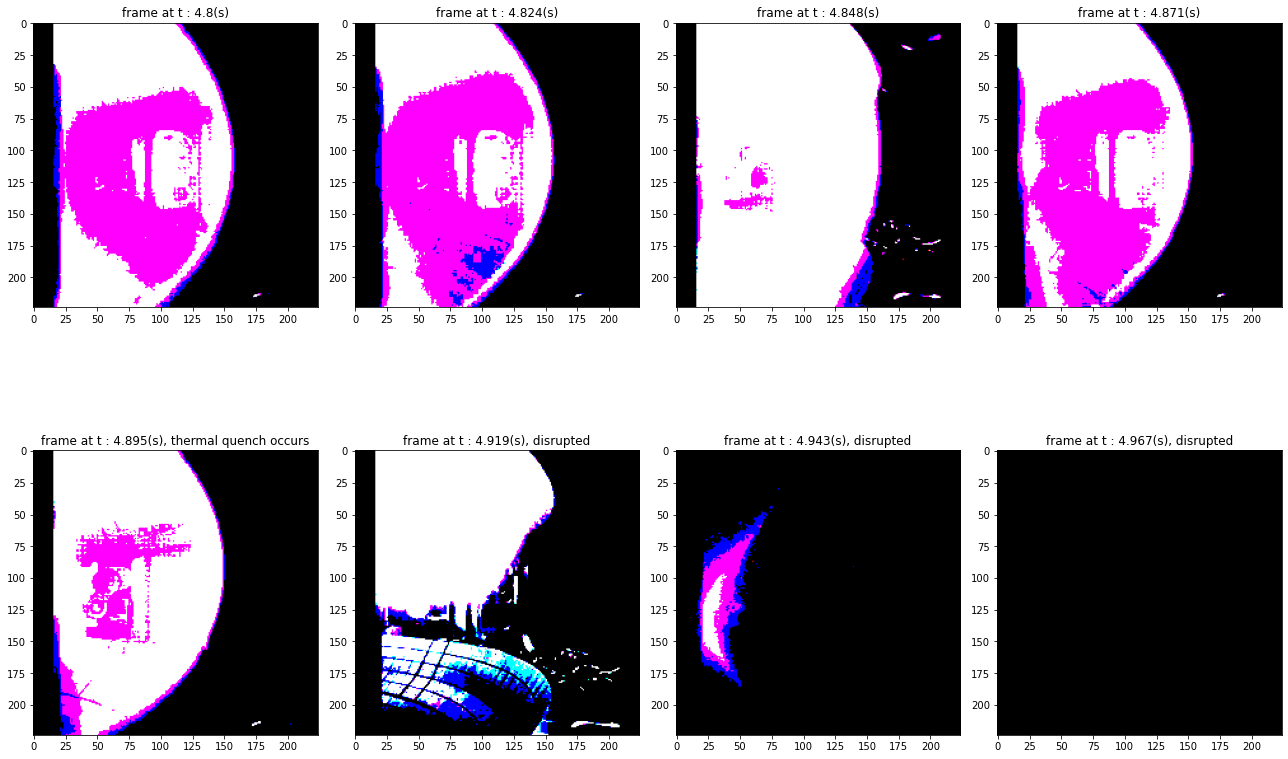

In [11]:
shot_number = 21731
show_all_frame(
    shot_number = shot_number,
    t_start = 4.8, 
    t_end = None, 
    t_interval = 1.0 / 210 * 5,
)

In [12]:
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import cv2
from src.utils.utility import crop, normalize
from functools import partial
from tqdm.auto import tqdm
from multiprocessing import Pool, cpu_count
import gc

save_dir = "./results/disruption_phase"
resize_height = 196
resize_width = 196
crop_size = 128
fps = 210
eps = 1e-3
t_interval_min = 4.0 / fps

t_disrupt_dict = {}

if not os.path.exists(save_dir):
    os.mkdir(os.path.join(save_dir))

kstar_shot_df = pd.read_csv('./dataset/KSTAR_Disruption_Shot_List.csv')

def main(idx : int, n_procs : int):

    print("process : {} start".format(idx))

    start_idx = len(video_shot_list) // n_procs * idx
    end_idx = len(video_shot_list) // n_procs  * (idx + 1)

    if idx == n_procs - 1:
        end_idx = len(video_shot_list)

    shot_list = video_shot_list[start_idx : end_idx]

    t_disrupt_dict[idx] = []

    for shot_num in tqdm(shot_list):
        t_tqend = kstar_shot_df[kstar_shot_df.shot == shot_num]["tTQend"].values[0]
        t_ipmin = kstar_shot_df[kstar_shot_df.shot == shot_num]["tipminf"].values[0]

        file_path = os.path.join(save_dir, "%06dtv01.png"%shot_num)
        video_dir = os.path.join("./dataset/raw_videos/raw_videos/", "%06dtv01.avi"%shot_num)

        if not os.path.exists(video_dir):
            video_dir = os.path.join("./dataset/raw_videos/raw_videos/", "%06dtv02.avi"%shot_num)

        capture = cv2.VideoCapture(video_dir)
        frame_count = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
        frame_width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
        frame_height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

        count = 0
        channels = 3
        retaining = True

        buffer = np.empty((frame_count, resize_height, resize_width, channels), np.dtype('float32'))

        while (count < frame_count and retaining):
            retaining, frame = capture.read()

            if frame is None:
                frame = np.zeros((resize_width, resize_height, channels))

            if (frame_height != resize_height) or (frame_width != resize_width):
                frame = cv2.resize(frame, (resize_width, resize_height))

            buffer[count] = frame
            count += 1

        capture.release()

        buffer = crop(buffer, resize_height, resize_width, crop_size)
        buffer = normalize(buffer)

        t_interval = (t_ipmin - t_tqend) / 2 if t_ipmin - t_tqend > t_interval_min * 2 else t_interval_min
        t_start = t_tqend - t_interval * 4
        t_end = t_tqend + t_interval * 4

        show_indices = range(round(t_start * fps), round(t_end * fps), round(t_interval * fps))

        # plot the image with (4 X N) array
        fig_width = 18
        fig_height = 0
        fig_cols = 4
        fig_rows = 2

        if len(show_indices) % fig_cols > 0:
            fig_rows += 1

        fig_height = int(fig_rows * 4.5) + 4

        axes=[]
        fig = plt.figure(figsize = (fig_width, fig_height), facecolor = 'white')

        is_tq = False
        is_iq = False
        t_disrupt = 0

        for idx in range(len(show_indices)):
            frame_idx = int(show_indices[idx])
            frame = buffer[frame_idx, :, :, :]
            t = frame_idx / fps
            axes.append(fig.add_subplot(fig_rows, fig_cols, idx+1))

            if eps * frame.shape[0] * frame.shape[1] * frame.shape[2] >= np.sum(frame):
                t_disrupt = t

            if t_tqend is not None and t >= t_tqend and not is_tq:
                subplot_title = "frame at t : " + str(round(t,3)) + "(s), thermal quench"
                is_tq = True
            elif t >= t_tqend and t < t_ipmin:
                subplot_title = "frame at t : " + str(round(t,3)) + "(s), disruptive phase"
            elif t >= t_ipmin and not is_iq:
                is_iq = True
                subplot_title = "frame at t : " + str(round(t,3)) + "(s), current quench"
            elif not is_tq:
                subplot_title = "frame at t : " + str(round(t,3)) + "(s)"
            elif is_iq and is_tq:
                subplot_title = "frame at t : " + str(round(t,3)) + "(s), disrupted"

            axes[-1].set_title(subplot_title)  
            plt.imshow(frame)

        t_disrupt_dict[idx].append(t_disrupt)

        fig.tight_layout()    
        plt.savefig(file_path, facecolor = fig.get_facecolor(), edgecolor = 'none', transparent = False)
        plt.close()

        del buffer
        del capture
        del fig

        gc.collect()

# if __name__ == "__main__":
#     n_procs = 8
#     pool = Pool(processes=n_procs)

#     do_process = partial(
#         main,
#         n_procs = n_procs
#     )

#     pool.map(do_process, [i for i in range(n_procs)])

#     pool.close()
#     pool.join()

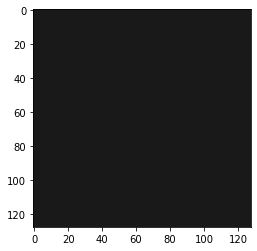

In [29]:
zero_shot = np.ones((128,128,3)) * 0.1
plt.imshow(zero_shot)

In [54]:
save_dir = "./results/disruption_phase"
resize_height = 196
resize_width = 196
crop_size = 128
fps = 210
eps = 1e-1
t_interval_min = 4.0 / fps

t_disrupt_list = []

if not os.path.exists(save_dir):
    os.mkdir(os.path.join(save_dir))

kstar_shot_df = pd.read_csv('./dataset/KSTAR_Disruption_Shot_List.csv')

for shot_num in tqdm(video_shot_list):
    t_tqend = kstar_shot_df[kstar_shot_df.shot == shot_num]["tTQend"].values[0]
    t_ipmin = kstar_shot_df[kstar_shot_df.shot == shot_num]["tipminf"].values[0]

    file_path = os.path.join(save_dir, "%06dtv01.png"%shot_num)
    video_dir = os.path.join("./dataset/raw_videos/raw_videos/", "%06dtv01.avi"%shot_num)

    if not os.path.exists(video_dir):
        file_path = os.path.join(save_dir, "%06dtv02.png"%shot_num)
        video_dir = os.path.join("./dataset/raw_videos/raw_videos/", "%06dtv02.avi"%shot_num)

    capture = cv2.VideoCapture(video_dir)
    frame_count = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

    count = 0
    channels = 3
    retaining = True

    buffer = np.empty((frame_count, resize_height, resize_width, channels), np.dtype('float32'))

    while (count < frame_count and retaining):
        retaining, frame = capture.read()

        if frame is None:
            frame = np.zeros((resize_width, resize_height, channels))

        if (frame_height != resize_height) or (frame_width != resize_width):
            frame = cv2.resize(frame, (resize_width, resize_height))

        buffer[count] = frame
        count += 1

    capture.release()

    buffer = crop(buffer, resize_height, resize_width, crop_size)
    buffer = normalize(buffer)

    t_interval = (t_ipmin - t_tqend) / 2 if t_ipmin - t_tqend > t_interval_min * 2 else t_interval_min
    t_start = t_tqend - t_interval * 4
    t_end = t_tqend + t_interval * 4

    if t_end * fps > frame_count:
        t_end = (frame_count-1) / fps

    show_indices = range(round(t_start * fps), round(t_end * fps), round(t_interval * fps))

    if frame_count < t_start * fps:
        t_disrupt = 0
        t_disrupt_list.append(t_disrupt)
        del buffer
        del capture
        continue

    # plot the image with (4 X N) array
    fig_width = 18
    fig_height = 0
    fig_cols = 4
    fig_rows = 2

    if len(show_indices) % fig_cols > 0:
        fig_rows += 1

    fig_height = int(fig_rows * 4.5) + 4

    axes=[]
    fig = plt.figure(figsize = (fig_width, fig_height), facecolor = 'white')

    is_tq = False
    is_iq = False
    is_cutoff = False
    t_disrupt = 0

    for idx in range(len(show_indices)):
        frame_idx = int(show_indices[idx])
        frame = buffer[frame_idx, :, :, :]
        t = frame_idx / fps
        axes.append(fig.add_subplot(fig_rows, fig_cols, idx+1))

        if eps * frame.shape[0] * frame.shape[1] * frame.shape[2] > np.sum(frame) and not is_cutoff:
            t_disrupt = t
            is_cutoff = True

        if t_tqend is not None and t >= t_tqend and not is_tq:
            subplot_title = "frame at t : " + str(round(t,3)) + "(s), thermal quench"
            is_tq = True
        elif t >= t_tqend and t < t_ipmin:
            subplot_title = "frame at t : " + str(round(t,3)) + "(s), disruptive phase"
        elif t >= t_ipmin and not is_iq:
            is_iq = True
            subplot_title = "frame at t : " + str(round(t,3)) + "(s), current quench"
        elif not is_tq:
            subplot_title = "frame at t : " + str(round(t,3)) + "(s)"
        elif is_iq and is_tq:
            subplot_title = "frame at t : " + str(round(t,3)) + "(s), disrupted"

        axes[-1].set_title(subplot_title)  
        plt.imshow(frame)

    t_disrupt_list.append(t_disrupt)

    fig.tight_layout()    
    plt.savefig(file_path, facecolor = fig.get_facecolor(), edgecolor = 'none', transparent = False)
    plt.close()

    del buffer
    del capture
    del fig

    gc.collect()

  0%|          | 0/82 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

In [55]:
t_tqend_list = []
t_ipmin_list = []
t_tftsrt_list = []
year_list = []

for shot in video_shot_list:
    t_tftsrt_list.append(kstar_shot_df[kstar_shot_df.shot == shot]['tftsrt'].values[0])
    t_tqend_list.append(kstar_shot_df[kstar_shot_df.shot == shot]['tTQend'].values[0])
    t_ipmin_list.append(kstar_shot_df[kstar_shot_df.shot == shot]['tipminf'].values[0])
    year_list.append(kstar_shot_df[kstar_shot_df.shot == shot]['year'].values[0])
    
new_shot_df = pd.DataFrame(
    {
        "shot" : video_shot_list,
        "year" : year_list,
        "tftsrt" : t_tftsrt_list,
        "tipminf" : t_ipmin_list,
        "tTQend":t_tqend_list,
        "tCutOff" : t_disrupt_list
    }
)

In [56]:
new_shot_df.to_csv("./dataset/KSTAR_Disruption_Shot_List_extend.csv")

In [57]:
post_quench_list = new_shot_df[new_shot_df.tCutOff < new_shot_df.tTQend]
pre_quench_list = new_shot_df[new_shot_df.tCutOff > new_shot_df.tTQend]

In [58]:
post_quench_list

,shot,year,tftsrt,tipminf,tTQend,tCutOff
0,21273,2018,2.996,5.535,5.514,5.438095
1,21274,2018,2.996,10.056,10.038,10.019048
2,21310,2018,1.500,5.368,5.342,5.266667
3,21315,2018,1.500,7.804,7.782,7.780952
4,21317,2018,1.500,9.460,9.438,9.361905
5,21320,2018,1.500,9.595,9.572,9.495238
9,21328,2018,4.499,9.312,9.283,9.261905
10,21332,2018,4.299,13.375,13.359,13.280952
11,21336,2018,4.299,8.393,8.375,8.300000
12,21350,2018,1.500,5.666,5.641,5.566667


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

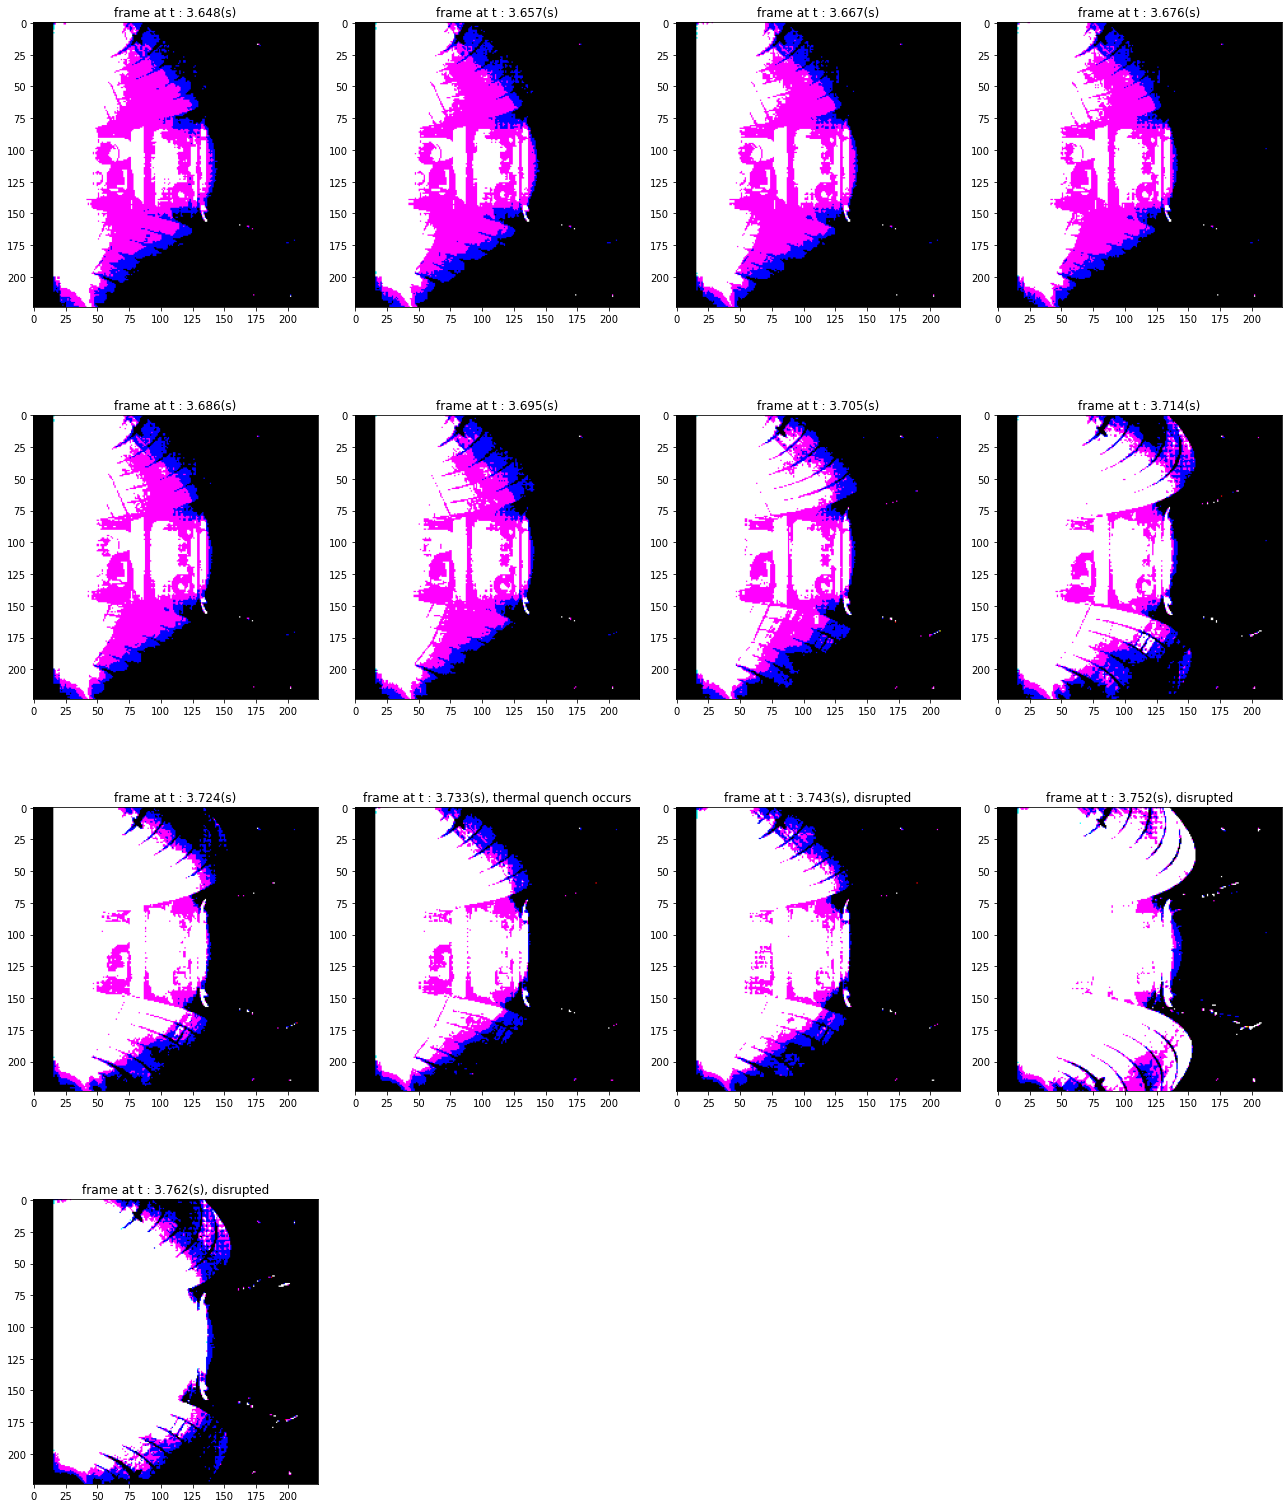

In [59]:
shot_number = 21630
show_all_frame(
    shot_number=shot_number,
    t_start = 3.65,
    t_interval=2.0 / fps
)

In [19]:
pre_quench_list

,shot,year,tftsrt,tipminf,tTQend,tCutOff
0,21273,2018,2.996,5.535,5.514,5.571429
1,21274,2018,2.996,10.056,10.038,10.095238
2,21310,2018,1.500,5.368,5.342,5.400000
3,21315,2018,1.500,7.804,7.782,7.838095
4,21317,2018,1.500,9.460,9.438,9.495238
...,...,...,...,...,...,...
75,21683,2018,5.500,8.657,8.617,8.690476
77,21730,2018,1.500,4.968,4.949,5.004762
78,21731,2018,1.500,4.913,4.895,4.952381
79,21735,2018,1.500,89.746,89.732,89.790476


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

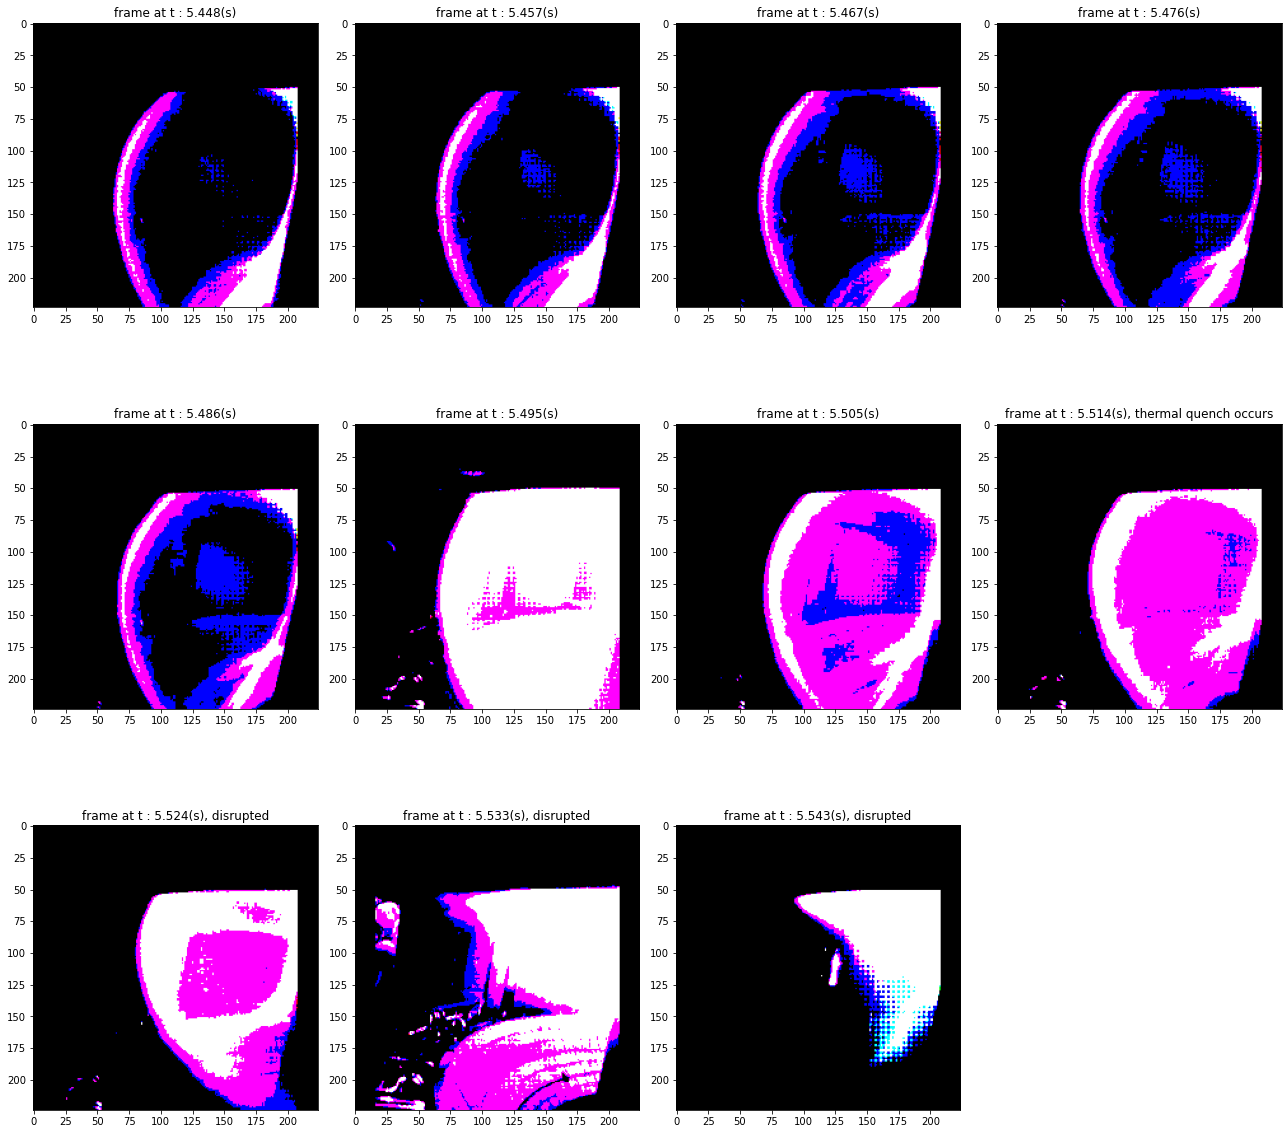

In [20]:
shot_number = 21273
show_all_frame(
    shot_number=shot_number,
    t_start = 5.45,
    t_interval=2.0 / fps
)

In [21]:
new_shot_df[new_shot_df.shot == 21747]

,shot,year,tftsrt,tipminf,tTQend,tCutOff
80,21747,2018,3.724,11.451,11.419,11.47619


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


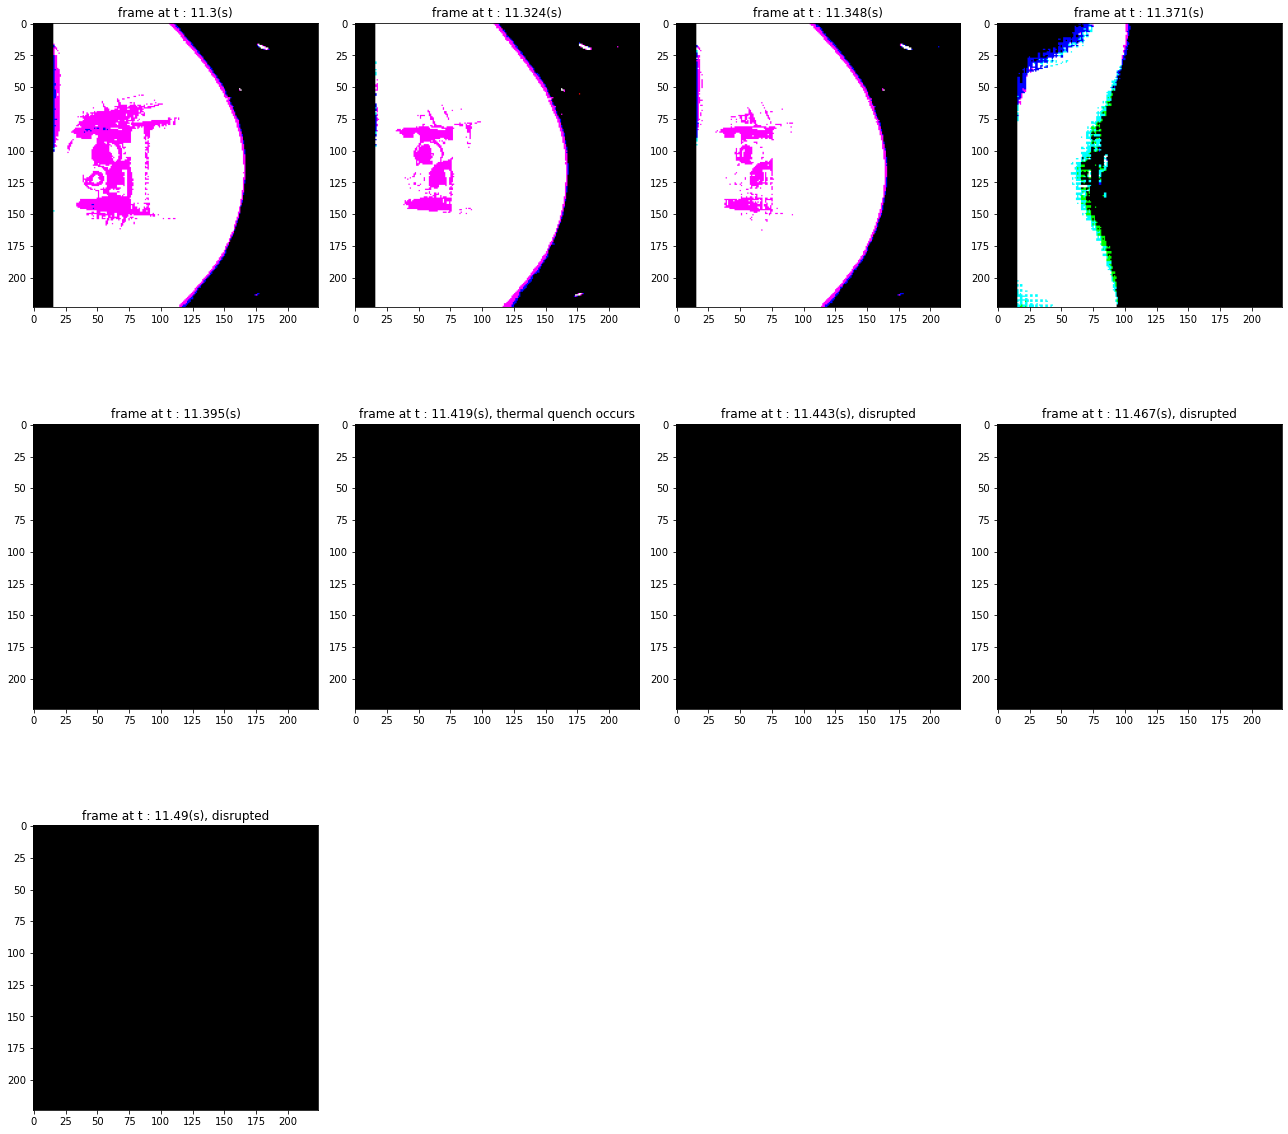

In [22]:
shot_number = 21747
show_all_frame(
    shot_number=shot_number,
    t_start = 11.3,
    t_interval=5.0 / fps
)